In [18]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arabic_reshaper
from bidi.algorithm import get_display

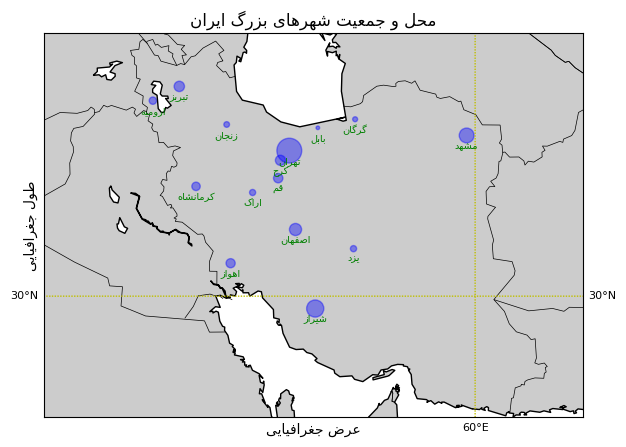

In [19]:
def farsi(farsi_str):
    return get_display(arabic_reshaper.reshape(farsi_str))

# create new figure, axes instances.
fig=plt.figure()
ax=fig.add_axes([0,0.1,1,.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=40.,llcrnrlat=25.,urcrnrlon=65.,urcrnrlat=40.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)

m.drawcoastlines()
m.fillcontinents()
m.drawstates()
m.drawcountries()

df = pd.read_csv('cities.csv')

x, y = m(df['lon'],df['lat'])
city = df['City']
plt.scatter(x,y, s=df['pop']/30000,color='b', alpha=0.4)
x, y = m(df['lon'],df['lat']-.5)
for i in range(len(df)):
    plt.text(x[i], y[i], farsi(city[i]), fontsize=7, color='g', horizontalalignment='center')
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1], color='y', fontsize=8)
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1], color='y', fontsize=8)

ax.set_title(farsi('محل و جمعیت شهرهای بزرگ ایران'))
plt.xlabel(farsi('عرض جغرافیایی'))
plt.ylabel(farsi('طول جغرافیایی'))
plt.show()